In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
Y = iris.target
print("Conjunto de dados IRIS", X.shape)
print("Conjunto de rótulos IRIS", Y.shape)

Conjunto de dados IRIS (150, 4)
Conjunto de rótulos IRIS (150,)


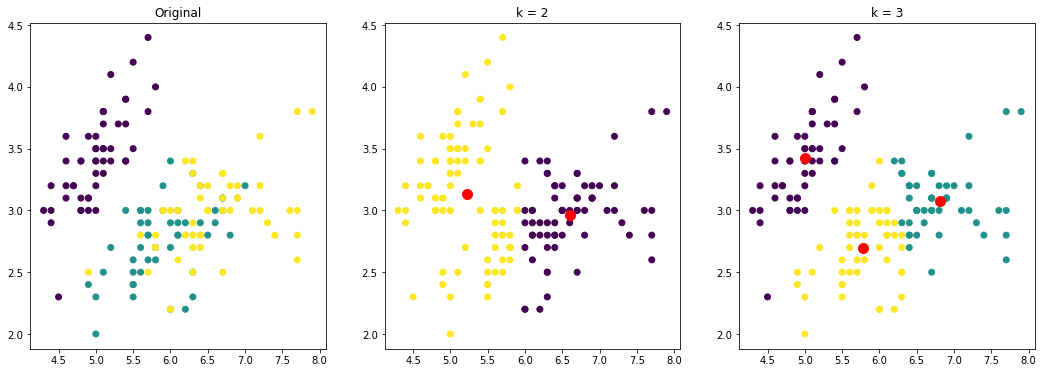

In [11]:
# parâmetros:
# n_clusters: quantidade de grupos a serem formados
# max_iterint: quantidade máxima de iterações (padrão=300)

kmedia2 = KMeans(n_clusters=2)
kmedia2_pred = kmedia2.fit_predict(X[:, [0, 1]])
kmedia3 = KMeans(n_clusters=3)
kmedia3_pred = kmedia3.fit_predict(X[:, [0, 1]])
kmedia4 = KMeans(n_clusters=4)
kmedia4_pred = kmedia4.fit_predict(X[:, [0, 1]])

centers2 = kmedia2.cluster_centers_
centers3 = kmedia3.cluster_centers_

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.scatter(X[:, 0], X[:, 1], c=Y)

plt.subplot(1, 3, 2)
plt.title("k = 2")
plt.scatter(X[:, 0], X[:, 1], c=kmedia2_pred)
plt.scatter(centers2[:,0], centers2[:,1], c='red', s=100)

plt.subplot(1, 3, 3)
plt.title("k = 3")
plt.scatter(X[:, 0], X[:, 1], c=kmedia3_pred)
plt.scatter(centers3[:,0], centers3[:,1], c='red', s=100)

plt.show()

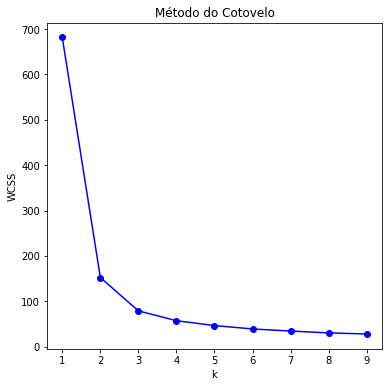

In [7]:
# Within-Cluster Sum of Square
WCSS = []

K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(6,6))
plt.plot(K, WCSS, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title("Método do Cotovelo")
plt.show()

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

print("K-médias com k = 2")
print('Silhouette Score:', silhouette_score(X, kmedia2_pred, metric='euclidean'))
print('Adjusted Rand Score:', adjusted_rand_score(kmedia2_pred, Y)) #medida de erro

In [12]:
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

print("K-médias com k = 2")
print('Silhouette Score:', silhouette_score(X, kmedia2_pred, metric='euclidean'))
print('Adjusted Rand Score:', adjusted_rand_score(kmedia2_pred, Y)) #medida de erro

print("K-médias com k = 3")
print('Silhouette Score:', silhouette_score(X, kmedia3_pred, metric='euclidean'))
print('Adjusted Rand Score:', adjusted_rand_score(kmedia3_pred, Y)) #medida de erro

print("K-médias com k = 4")
print('Silhouette Score:', silhouette_score(X, kmedia4_pred, metric='euclidean'))
print('Adjusted Rand Score:', adjusted_rand_score(kmedia4_pred, Y)) #medida de erro
# resultado -1 a 1

K-médias com k = 2
Silhouette Score: 0.4465720572721772
Adjusted Rand Score: 0.3229782381108277
K-médias com k = 3
Silhouette Score: 0.5064833307336704
Adjusted Rand Score: 0.6006861021484542
K-médias com k = 4
Silhouette Score: 0.29651706232666014
Adjusted Rand Score: 0.386747240793007


**Analisar os datasets:**

- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

Quanto a:
- Qual o melhor valor de k?
- Qual a melhor técnica (K-Means ou K-Medoids)? Utilize a Métrica da Silhueta para comprovar!!!



In [13]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 16.7 MB/s eta 0:00:01


Conjunto de dados (178, 13)
Conjunto de rótulos (178,)


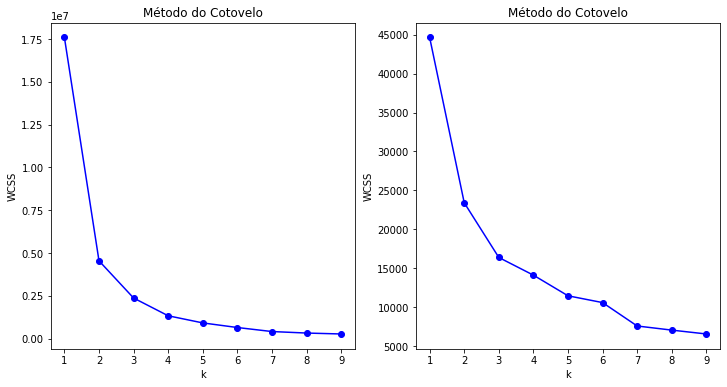

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.datasets import load_iris
from sklearn.datasets import load_wine

#dados = load_iris()
dados = load_wine()


X = dados.data
Y = dados.target
print("Conjunto de dados", X.shape)
print("Conjunto de rótulos", Y.shape)

WCSS_kmeans = []
WCSS_kmedoi = []

K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X)
    WCSS_kmeans.append(kmeans.inertia_)

    kmedoids = KMedoids(n_clusters=k).fit(X)
    WCSS_kmedoi.append(kmedoids.inertia_)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(K, WCSS_kmeans, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title("Método do Cotovelo")

plt.subplot(1, 2, 2)
plt.plot(K, WCSS_kmedoi, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title("Método do Cotovelo")

plt.show()

In [26]:
kmedia = KMeans(n_clusters=3)
kmedia_pred = kmedia.fit_predict(X)
kmedoi = KMedoids(n_clusters=3)
kmedoi_pred = kmedoi.fit_predict(X)

print("K-médias")
print('Silhouette Score:', silhouette_score(X, kmedia_pred, metric='euclidean'))
print('Adjusted Rand Score:', adjusted_rand_score(kmedia_pred, Y)) #medida de erro

print("\nK-medoids")
print('Silhouette Score:', silhouette_score(X, kmedoi_pred, metric='euclidean'))
print('Adjusted Rand Score:', adjusted_rand_score(kmedoi_pred, Y)) #medida de erro

K-médias
Silhouette Score: 0.5711381937868838
Adjusted Rand Score: 0.37111371823084754

K-medoids
Silhouette Score: 0.566648040863657
Adjusted Rand Score: 0.39412433717671946
